# **#import libraries**

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans
import time
import psutil
from sklearn.cluster import DBSCAN
import os


# **  EXPLORATION DATA**

In [2]:
mall_customer=pd.read_csv('Mall_Customers.csv')

In [3]:
mall_customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#there is no missing values ...THATS GOOD!!

In [5]:
mall_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
mall_customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**feture engenireeng**

In [7]:
#dropping the customerID column Because it is not useful for data analysis

In [8]:
mall_customer.drop(['CustomerID'],axis=1,inplace=True)
mall_customer.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


encoding

use onehotencoder better than labelencoder
# **bold text**
---


**bold text**# New Section

In [9]:
#use onehotencoder better than labelencoder

In [10]:
from sklearn.preprocessing import OneHotEncoder

gender=mall_customer[['Gender']]
encoddr=OneHotEncoder()
gender_encoding=encoddr.fit_transform(gender)
gender_encoding=gender_encoding.toarray()
gender_df=pd.DataFrame(gender_encoding , columns=encoddr.get_feature_names_out(['Gender']))
mall_customer=mall_customer.drop(['Gender'],axis=1)
mall_customer=pd.concat([mall_customer, gender_df],axis=1)
mall_customer.head()


,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0.0,1.0
1,21,15,81,0.0,1.0
2,20,16,6,1.0,0.0
3,23,16,77,1.0,0.0
4,31,17,40,1.0,0.0


In [11]:
 #Best for nominal (non-ordered) data like gender
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
features=['Age','Annual Income (k$)','Spending Score (1-100)']
mall_customer[features]=scaler.fit_transform(mall_customer[features])
mall_customer.head()


,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,0.0,1.0
1,-1.281035,-1.738999,1.195704,0.0,1.0
2,-1.352802,-1.700830,-1.715913,1.0,0.0
3,-1.137502,-1.700830,1.040418,1.0,0.0
4,-0.563369,-1.662660,-0.395980,1.0,0.0


visualization mall customers data  before PCA

In [12]:
#visualization mall customers data before PCA

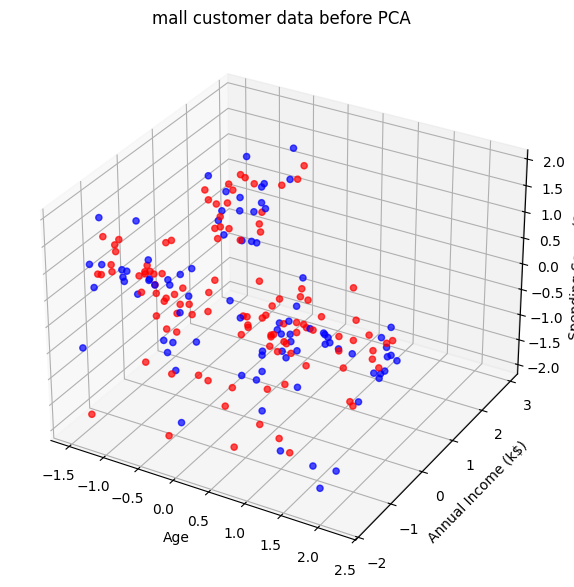

In [13]:
feature=mall_customer[['Age','Annual Income (k$)','Spending Score (1-100)']].values
color={1 :'red' , 0 :'blue'}
colors=mall_customer['Gender_Female'].map(color)
fig=plt.figure(figsize=(7,10))
ax=fig.add_subplot(projection='3d')
ax.scatter(feature[:,0],feature[:,1],feature[:,2],c=colors,alpha=0.7)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('mall customer data before PCA')
plt.show()

In [14]:
from sklearn.decomposition import PCA

pca=PCA()
pca_mall_customer=pca.fit_transform(mall_customer)

#CALCULATE VARIANCE
variance=np.var(pca_mall_customer,axis=0)
total_var=np.sum(variance)
exp_var=variance/total_var


for i in range(len(exp_var)) :
  ratio=exp_var [i]*100
  print('component' ,i+1 , 'exeplane',round(ratio,2), 'of Data')
covariance=np.cov(mall_customer)
eig_value,eig_vector=np.linalg.eig(covariance)
explained_ratio=eig_value/eig_value.sum()
exp_cov=np.cumsum(explained_ratio)

n_comp_90=np.argmax(exp_cov>=0.90)+1
n_comp_95=np.argmax(exp_cov>=0.95)+1
print("Component ≥90% v:", n_comp_90)
print("Component ≥95% v:", n_comp_95)



component 1 exeplane 38.13 of Data
component 2 exeplane 28.71 of Data
component 3 exeplane 19.26 of Data
component 4 exeplane 13.9 of Data
component 5 exeplane 0.0 of Data
Component ≥90% v: 4
Component ≥95% v: 4


In [15]:
#Mall Customer Principle Component after apply it

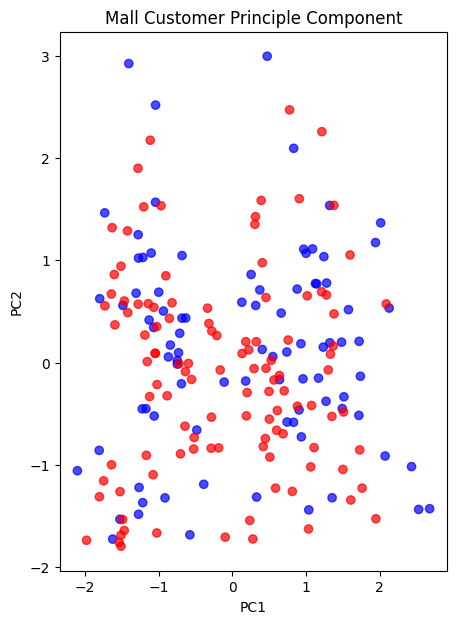

In [16]:
pca=PCA(n_components=2)
pca_mall_customer=pca.fit_transform(mall_customer)
fig=plt.figure(figsize=(5,7))
ax=fig.add_subplot()
ax.scatter(pca_mall_customer[:,0],pca_mall_customer[:,1],c=colors,alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Mall Customer Principle Component')
plt.show()

In [17]:
#APPLY TSNE THATS DIVID Data and reduce a dimentiones of data

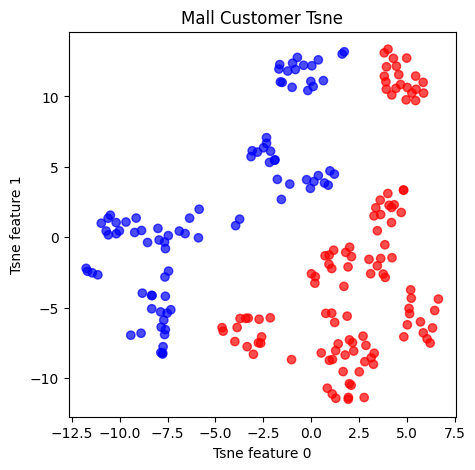

In [18]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2,perplexity=30 ,early_exaggeration=12 , learning_rate='auto' ,random_state=42)
tsne_mall_customer=tsne.fit_transform(mall_customer)
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot()
ax.scatter(tsne_mall_customer[:,0],tsne_mall_customer[:,1],c=colors,alpha=0.7)
ax.set_xlabel('Tsne feature 0')
ax.set_ylabel('Tsne feature 1')
ax.set_title('Mall Customer Tsne')
plt.show()

In [19]:
#Apply TSNE AND PCA in same plot

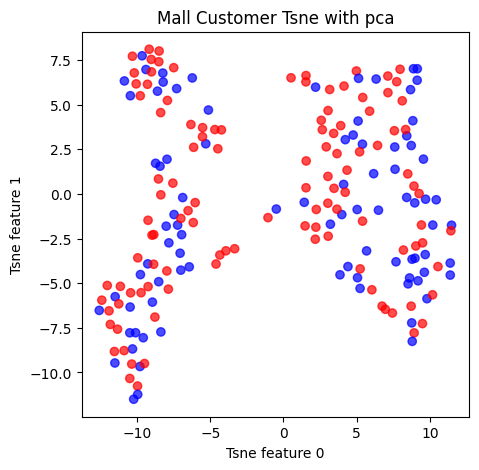

In [20]:

tsne=TSNE(n_components=2,perplexity=30 ,early_exaggeration=12 , learning_rate='auto' ,random_state=42)
tsne_mall_customer=tsne.fit_transform(pca_mall_customer)
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot()
ax.scatter(tsne_mall_customer[:,0],tsne_mall_customer[:,1],c=colors,alpha=0.7)
ax.set_xlabel('Tsne feature 0')
ax.set_ylabel('Tsne feature 1')
ax.set_title('Mall Customer Tsne with pca')
plt.show()


In [21]:
#SHOW THE ELBOW METHOD with pca

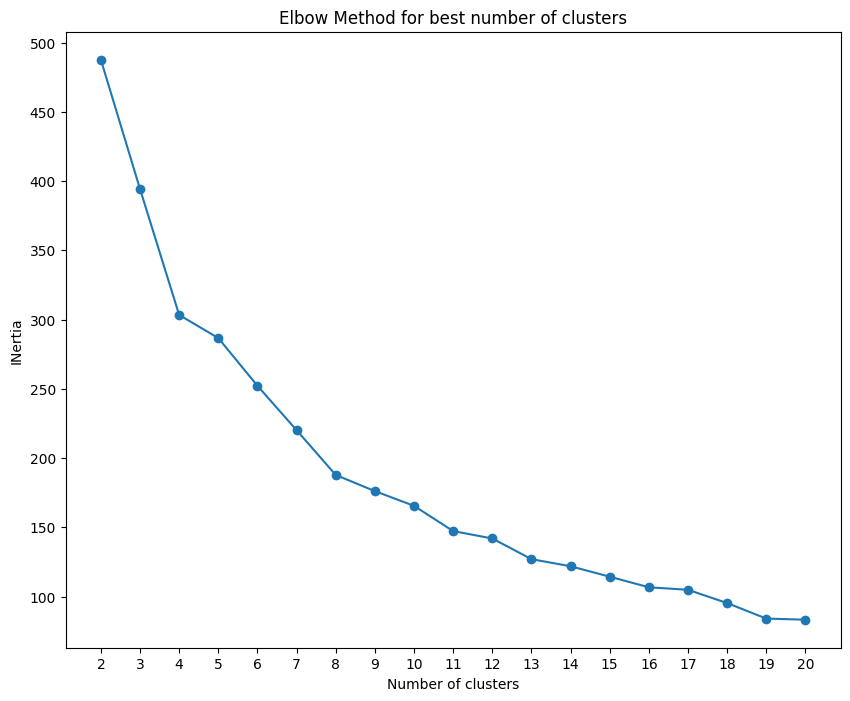

In [22]:
inertia=[]
k_value=range(2,21)
for i in k_value:
  kmeans=KMeans(n_clusters=i,random_state=42).fit(mall_customer)
  inertia.append(kmeans.inertia_)
plt.figure(figsize=(10,8))
plt.plot(k_value,inertia,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('INertia')
plt.title('Elbow Method for best number of clusters')
plt.xticks(k_value)
plt.show()


In [23]:
#SHOW THE ELBOW METHOD with pca and its between  4 and the goal is to find the point where the inertia

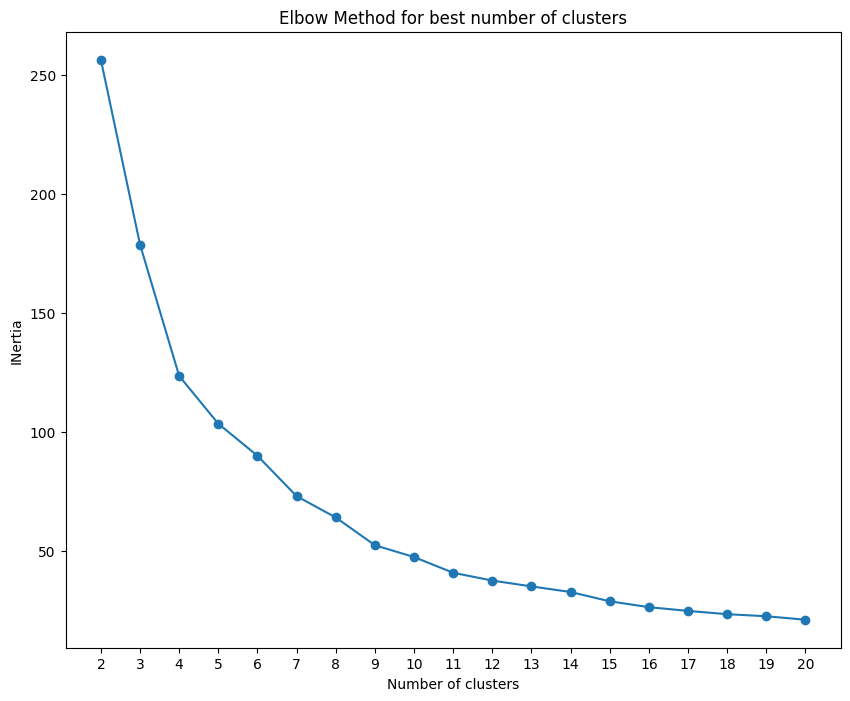

In [24]:
inertia=[]
k_value=range(2,21)
for i in k_value:
  kmeans=KMeans(n_clusters=i,random_state=42).fit(pca_mall_customer)
  inertia.append(kmeans.inertia_)
plt.figure(figsize=(10,8))
plt.plot(k_value,inertia,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('INertia')
plt.title('Elbow Method for best number of clusters')
plt.xticks(k_value)
plt.show()


In [25]:
#CALULATE kmaens SILHOETTE with out PCA

k value 2 score  0.28206497092786603
k value 3 score  0.2861725878964348
k value 4 score  0.31836116467408593
k value 5 score  0.2800788749757102
k value 6 score  0.2743920723086142
k value 7 score  0.2910215637837165
k value 8 score  0.3336703084868799
k value 9 score  0.32420864076111916
k value 10 score  0.3058261957286518
k value 11 score  0.342746873657411
k value 12 score  0.3364403550393535
k value 13 score  0.35618017025610227
k value 14 score  0.3545207682410755
k value 15 score  0.3497724034298068
k value 16 score  0.34725097921244796
k value 17 score  0.3349913716884733
k value 18 score  0.34870118240357206
k value 19 score  0.3673299325731579
k value 20 score  0.36048374419203666


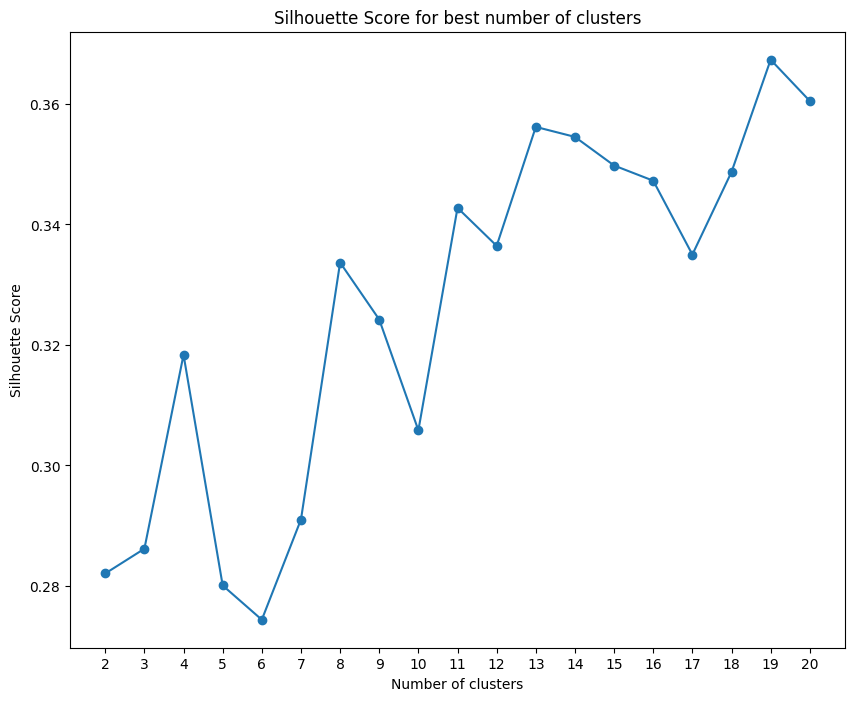

In [26]:


silhouette_scores=[]
k_value=range(2,21)
for i in k_value:
  kmeans=KMeans(n_clusters=i,random_state=42)
  labels=kmeans.fit_predict(mall_customer)
  scores=silhouette_score(mall_customer,labels)
  silhouette_scores.append(scores)
  print("k value", i, "score ",scores)

plt.figure(figsize=(10,8))
plt.plot(k_value,silhouette_scores,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for best number of clusters')
plt.xticks(k_value)
plt.show()

In [27]:
#CALCULATE  kmeans silhouette scores with PCA  the higher the silhouette score the better the clustering quality. it was k= 19

k value 2 score  0.4239576386013236
k value 3 score  0.4126027433451476
k value 4 score  0.42304347634644546
k value 5 score  0.38545020878726305
k value 6 score  0.37711443385986476
k value 7 score  0.3647572871467205
k value 8 score  0.3548230065919856
k value 9 score  0.38825249136607
k value 10 score  0.3826842032774027
k value 11 score  0.3930589021894286
k value 12 score  0.3799116968167251
k value 13 score  0.3797335191706057
k value 14 score  0.3782138815342536
k value 15 score  0.3846410723758929
k value 16 score  0.40283142540106553
k value 17 score  0.38535664635101013
k value 18 score  0.37699522851497397
k value 19 score  0.36433188689697416
k value 20 score  0.3620538394863528


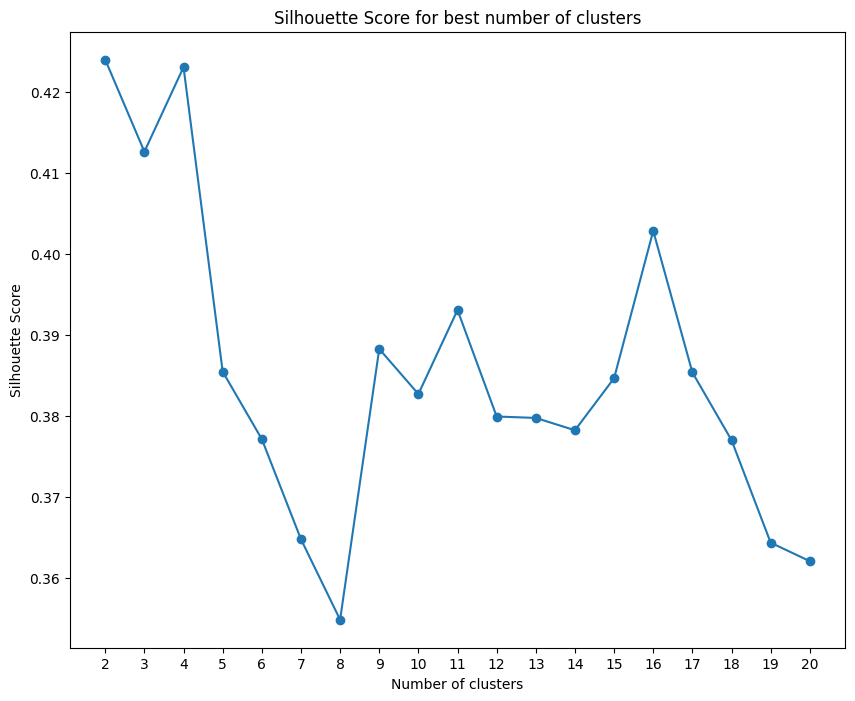

In [28]:
silhouette_scores=[]
k_value=range(2,21)
for i in k_value:
  kmeans=KMeans(n_clusters=i,random_state=42)
  labels=kmeans.fit_predict(pca_mall_customer)
  scores=silhouette_score(pca_mall_customer,labels)
  silhouette_scores.append(scores)
  print("k value", i, "score ",scores)

plt.figure(figsize=(10,8))
plt.plot(k_value,silhouette_scores,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for best number of clusters')
plt.xticks(k_value)
plt.show()

In [29]:
#silhouette model and the best value of k

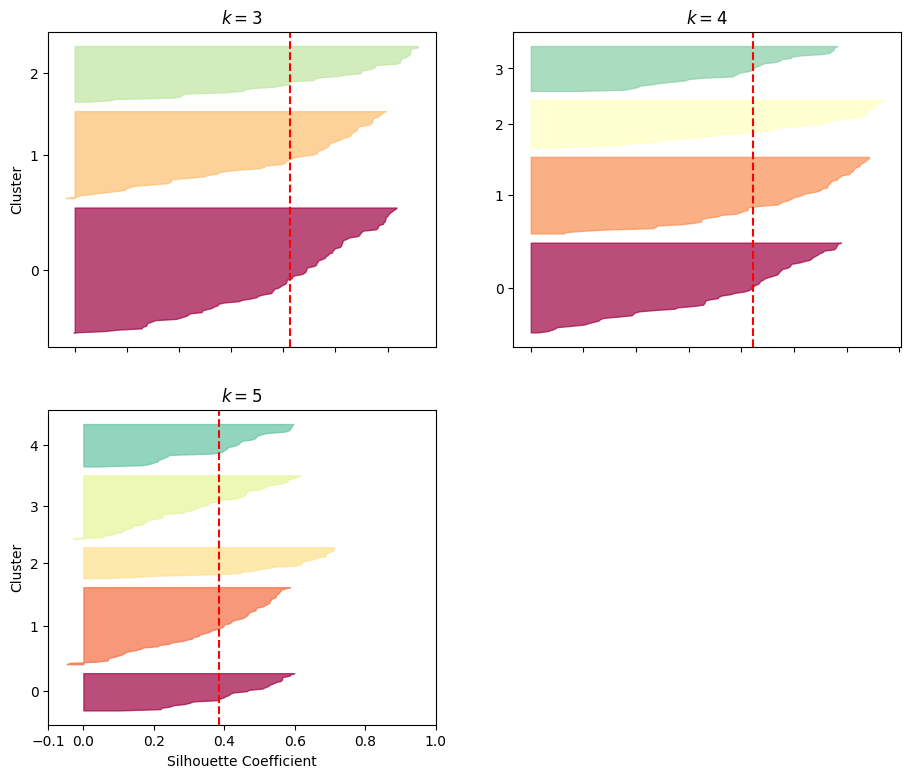

In [30]:


from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

kmeans_per_k = {}
for k in (3, 4, 5):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init to avoid future warnings
    kmeans.fit(pca_mall_customer)  # Fit the model to your data
    kmeans_per_k[k] = kmeans
plt.figure(figsize=(11, 9))


for k in (3, 4, 5):
    plt.subplot(2, 2, k - 2)
    y_pred = kmeans_per_k[k].labels_
    silhouette_coefficients = silhouette_samples(pca_mall_customer, y_pred)
    padding = len(pca_mall_customer) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

#save_fig("silhouette_analysis_plot")
plt.show()

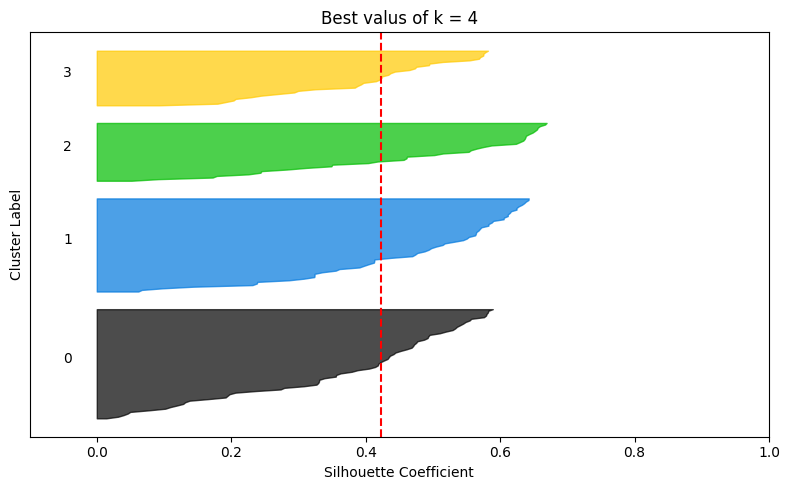

In [31]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm # Import the colormap module

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(pca_mall_customer)
silhouette_vals = silhouette_samples(pca_mall_customer, labels) # Use silhouette_samples to get individual scores
silhouette_avg = silhouette_score(pca_mall_customer, labels)

fig, ax1 = plt.subplots(figsize=(8, 5))
y_lower = 10

for i in range(k):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / k)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_title("Best valus of k = 4")
ax1.set_xlabel("Silhouette Coefficient")
ax1.set_ylabel("Cluster Label")
ax1.set_yticks([])
ax1.set_xlim([-0.1, 1])
plt.tight_layout()
plt.show()

In [32]:
def prepare_data_for_kmeans(mall_customer):
  if 'Cluster' in mall_customer.columns:
     mall_customer_for_kmeans = mall_customer.drop(['Cluster'], axis=1)#orj data has 7 features, but PCA is expecting 6 features as input.
  else:                                                                 #this lines for this reasons
      mall_customer_for_kmeans = mall_customer.copy()
  return mall_customer_for_kmeans

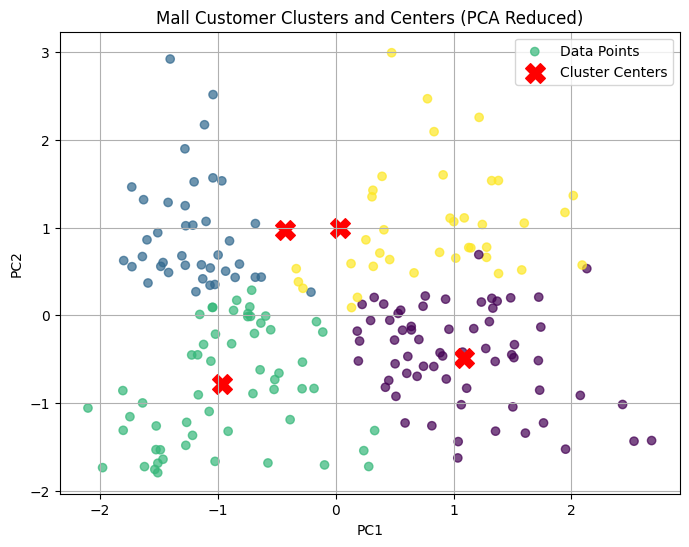

In [33]:
#KMEANS CODE


kmeans_time = time.time()


kmeans=KMeans(n_clusters=4,random_state=42)
kmeans.fit(prepare_data_for_kmeans(mall_customer))
labels=kmeans.labels_
mall_customer['Cluster']=labels
kmeans.inertia_
cluster_centerrs = kmeans.cluster_centers_
plt.figure(figsize=(8, 6))
plt.scatter(pca_mall_customer[:, 0], pca_mall_customer[:, 1], c=mall_customer['Cluster'], cmap='viridis', alpha=0.7, label='Data Points')
plt.scatter(cluster_centerrs[:, 0], cluster_centerrs[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Mall Customer Clusters and Centers (PCA Reduced)')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
kmeans_time = time.time() - kmeans_time
print(f"K-Means execution time: {kmeans_time:.4f} seconds")

K-Means execution time: 0.2204 seconds


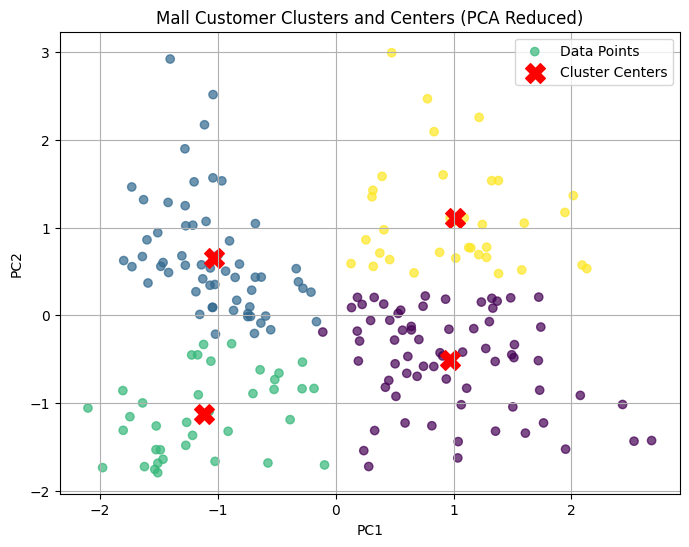

In [35]:
#KMEANS CODE

pca_kmeans_time = time.time()

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(pca_mall_customer)
labels = kmeans.labels_
mall_customer['Cluster'] = labels
cluster_centerrs = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(pca_mall_customer[:, 0], pca_mall_customer[:, 1], c=mall_customer['Cluster'], cmap='viridis', alpha=0.7, label='Data Points')
plt.scatter(cluster_centerrs[:, 0], cluster_centerrs[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Mall Customer Clusters and Centers (PCA Reduced)')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
pca_kmeans_time = time.time() - pca_kmeans_time
print(f"K-Means execution time: {pca_kmeans_time:.4f} seconds")

K-Means execution time: 0.2559 seconds


In [37]:
#code 2
#CODE OF KMEANS++
kpluses_time = time.time()
mall_customer_for_kmeanspluses=prepare_data_for_kmeans(mall_customer)

kmeans_pluses = KMeans(n_clusters=4,n_init=10,init='k-means++', random_state =42,algorithm ='elkan' ).fit(mall_customer_for_kmeanspluses)

mall_customer['Cluster'] = kmeans_pluses.labels_

cluster_centers = kmeans_pluses.cluster_centers_
pca_centerrs =pca.transform(cluster_centers)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [38]:
cluster_centers

array([[ 1.06297508, -0.4946758 , -0.37865953,  0.58461538,  0.41538462],
       [-0.42880597,  0.97484722,  1.21608539,  0.55      ,  0.45      ],
       [-0.96249203, -0.78476346,  0.39202966,  0.59649123,  0.40350877],
       [ 0.0768659 ,  0.9971462 , -1.22042727,  0.47368421,  0.52631579]])

In [39]:
kmaenspluses_time = time.time() - kpluses_time
print(f"K-Means++ execution time: {kmaenspluses_time:.4f} seconds")

K-Means++ execution time: 0.0529 seconds


In [40]:
print(f"Number of customers in each clusster : {mall_customer['Cluster'].value_counts()}")

Number of customers in each clusster : Cluster
0    65
2    57
1    40
3    38
Name: count, dtype: int64


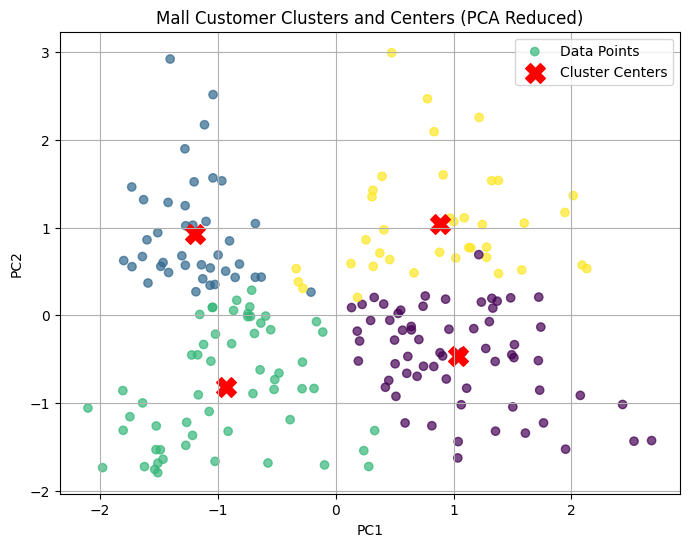

In [41]:
#code to show center of clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_mall_customer[:, 0], pca_mall_customer[:, 1], c=mall_customer['Cluster'], cmap='viridis', alpha=0.7, label='Data Points')
plt.scatter(pca_centerrs[:, 0], pca_centerrs[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Mall Customer Clusters and Centers (PCA Reduced)')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
'''import numpy as np

#
co_v = np.cov(mall_customer.T)
eig_val, eig_vec = np.linalg.eig(co_v)
ex_v = eig_val / eig_val.sum()
cum_e_v = np.cumsum(ex_v)

n_com_90 = np.argmax(cum_e_v >= 0.90) + 1
n_com_95 = np.argmax(cum_e_v >= 0.95) + 1

print("Number of components explaining ≥90% variance:", n_com_90)
print("Number of components explaining ≥95% variance:", n_com_95)
'''

'import numpy as np\n\n#\nco_v = np.cov(mall_customer.T)\neig_val, eig_vec = np.linalg.eig(co_v)\nex_v = eig_val / eig_val.sum()\ncum_e_v = np.cumsum(ex_v)\n\nn_com_90 = np.argmax(cum_e_v >= 0.90) + 1\nn_com_95 = np.argmax(cum_e_v >= 0.95) + 1\n\nprint("Number of components explaining ≥90% variance:", n_com_90)\nprint("Number of components explaining ≥95% variance:", n_com_95)\n'

In [43]:
#MINI-BATCH CODE
start_time = time.time()

mini_kmeans = MiniBatchKMeans(n_clusters  = 4 , n_init=10,max_iter=150,random_state=42)
mini_kmeans.fit(prepare_data_for_kmeans(mall_customer))
mall_customer['Cluster'] = mini_kmeans.labels_
mini_center = mini_kmeans.cluster_centers_
pca_mini = pca.transform(mini_center)






/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [44]:
mb_time = time.time() - start_time
print(f"Mini-Batch K-Means execution time: {mb_time:.4f} seconds")

Mini-Batch K-Means execution time: 0.0306 seconds


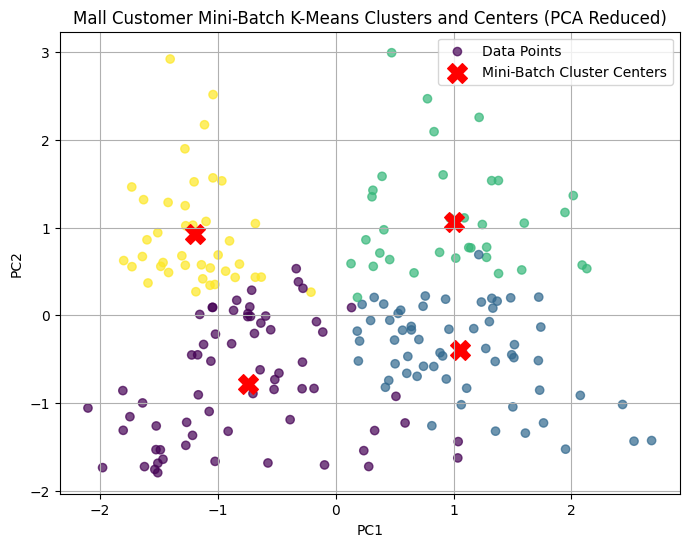

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_mall_customer[:, 0], pca_mall_customer[:, 1], c=mall_customer['Cluster'], cmap='viridis', alpha=0.7, label='Data Points')
plt.scatter(pca_mini[:, 0], pca_mini[:, 1], c='red', marker='X', s=200, label='Mini-Batch Cluster Centers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Mall Customer Mini-Batch K-Means Clusters and Centers (PCA Reduced)')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
#to see use storege in models

In [47]:
import sys
print(f"Memory usage to kmaens -> {sys.getsizeof(kmeans)} bytes")

print(f"Momery usage to  kmeans++ -> {sys.getsizeof(pca_centerrs )} bytes")

print(f"Memory usage to MiniBatch -> {sys.getsizeof(kmeans)} bytes")

Memory usage to kmaens -> 56 bytes
Momery usage to  kmeans++ -> 192 bytes
Memory usage to MiniBatch -> 56 bytes


In [48]:
#DBSCAN CODE


In [49]:
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.cluster import DBSCAN


min_samples_values = [3, 5, 10]
eps_values = [0.08, 0.5, 0.5]
fig = make_subplots(rows=1, cols=3, subplot_titles=[
    f"min_samples={m}, eps={e}" for m, e in zip(min_samples_values, eps_values)
])


for i, (min_samples, eps) in enumerate(zip(min_samples_values, eps_values), start=1):
    DBS = DBSCAN(eps=eps, min_samples=min_samples)
    dbs_label = DBS.fit_predict(pca_mall_customer)
    df_temp = pd.DataFrame(pca_mall_customer, columns=['PC1', 'PC2'])
    df_temp['Cluster'] = dbs_label.astype(str)

    scatter = px.scatter(df_temp, x='PC1', y='PC2', color='Cluster', title=f"DBSCAN eps={eps}, min_samples={min_samples}")

    for trace in scatter['data']:
        fig.add_trace(trace, row=1, col=i)

fig.update_layout(height=500, width=1200, title_text="DBSCAN Clustering on PCA Data (Mall Customers)")
fig.show()


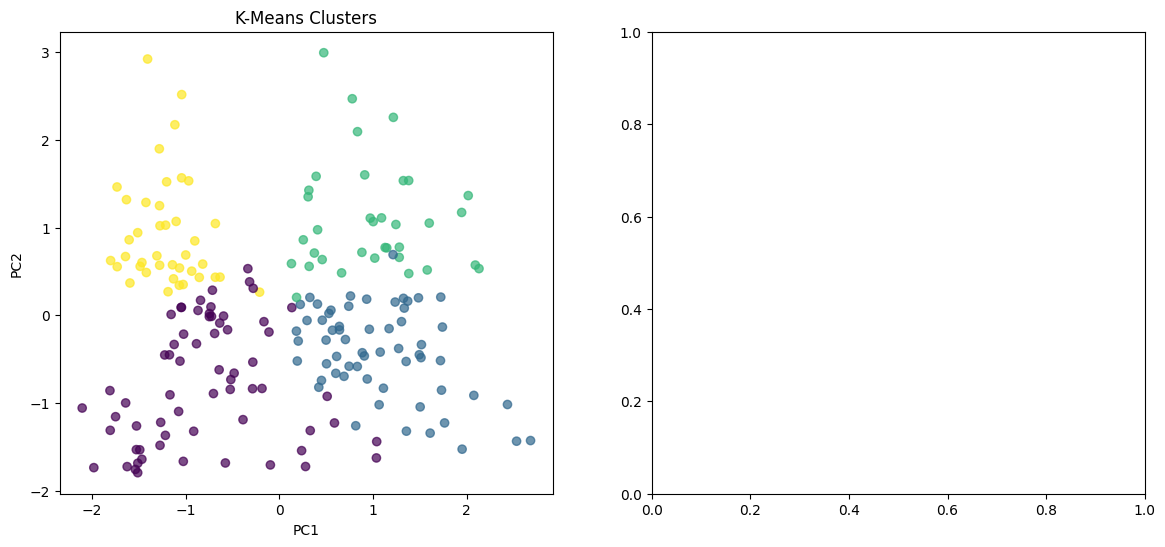

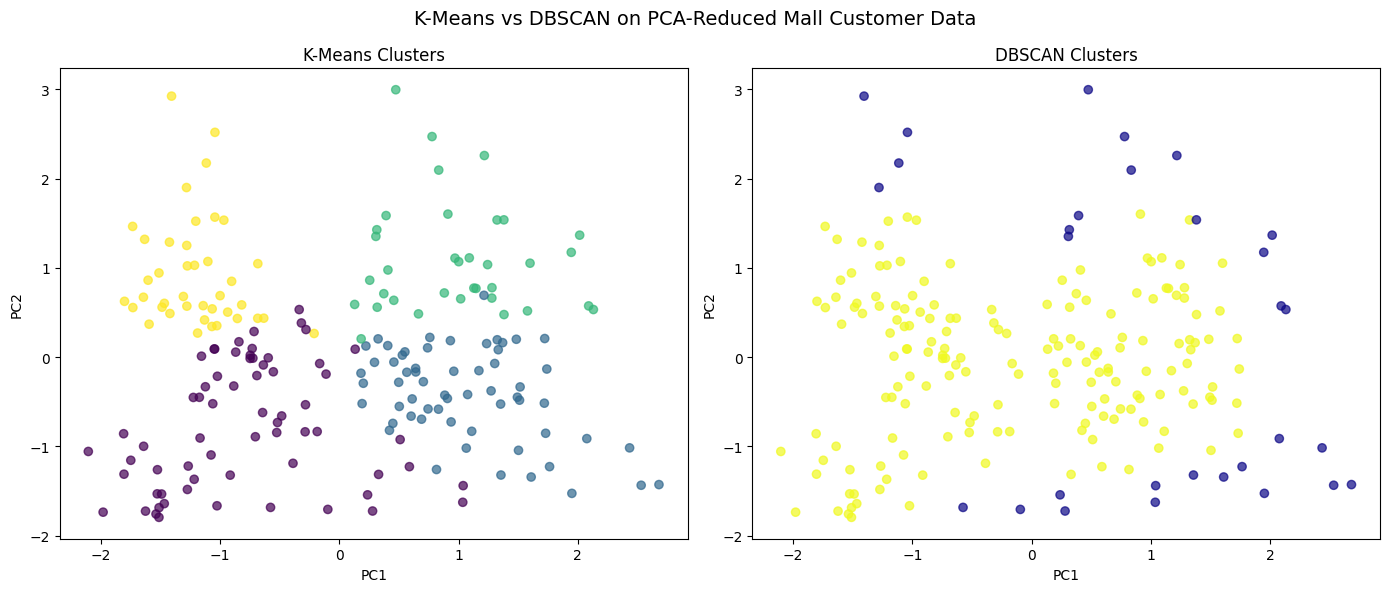

<Figure size 640x480 with 0 Axes>

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# K-Means plot
axes[0].scatter(pca_mall_customer[:, 0], pca_mall_customer[:, 1], c=mall_customer['Cluster'], cmap='viridis', alpha=0.7)
axes[0].set_title("K-Means Clusters")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# K-Means plot
axes[0].scatter(pca_mall_customer[:, 0], pca_mall_customer[:, 1], c=mall_customer['Cluster'], cmap='viridis', alpha=0.7)
axes[0].set_title("K-Means Clusters")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

# DBSCAN plot
axes[1].scatter(pca_mall_customer[:, 0], pca_mall_customer[:, 1], c=DBS.labels_, cmap='plasma', alpha=0.7)
axes[1].set_title("DBSCAN Clusters")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

plt.suptitle("K-Means vs DBSCAN on PCA-Reduced Mall Customer Data", fontsize=14)
plt.tight_layout()
plt.show()
axes[0].set_ylabel("PC2")

plt.suptitle("K-Means vs DBSCAN on PCA-Reduced Mall Customer Data", fontsize=14)
plt.tight_layout()
plt.show()

In [51]:
mall_customer.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Cluster
0,-1.424569,-1.738999,-0.434801,0.0,1.0,0
1,-1.281035,-1.738999,1.195704,0.0,1.0,0
2,-1.352802,-1.700830,-1.715913,1.0,0.0,0
3,-1.137502,-1.700830,1.040418,1.0,0.0,0
4,-0.563369,-1.662660,-0.395980,1.0,0.0,0
